In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel(r'E:\Datasets\train_agriculture.xlsx')
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [3]:
# Checking the shape of columns and rows.
df.shape

(4599, 10)

Observation: In the dataset, 4599 rows and 10 columns are present.

In [4]:
#Checking the information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


Observation:
1. Only one attribute i.e. ID is of object datatype.
2. Rest of the attributes are of integer or float datatypes.

In [5]:
#Checking the name of columns
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [6]:
# Checking the datatype.
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [7]:
# Checking unique entries in each of the column.
df.nunique().to_frame().transpose()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,4599,71,2,2,3,20,63,47,3,3


In [8]:
# Checking for null values
df.isnull().values.any()

True

In [9]:
# Checking null values column wise
df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

Findings:
1. We have 442 NaN values present in the attribute 'Number_Weeks_Used'
2. Since, this attribute is continuous in nature, I shall be imputing the missing values with median.

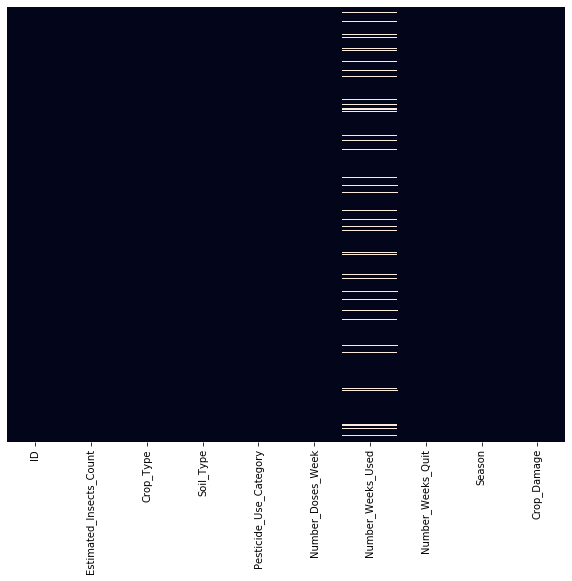

In [10]:
# Seeing the missing value via visualization
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [11]:
# Imputing the missing value with their median.
df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].median(),inplace=True)

In [12]:
# Now checking the null values again.
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

Observations:
1. All the null values have been removed.
2. The attribute 'ID' is of no use in data analysis, so we can drop this column.

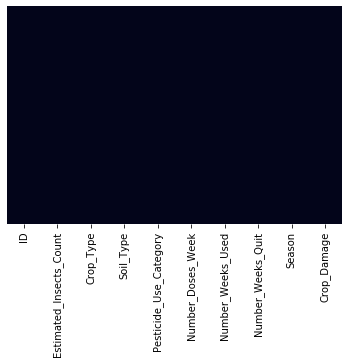

In [13]:
# with heatmap again checking the missing value.
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

We see that null values have been removed.

In [14]:
#Checking for any missing values present in the dataset.
df.isnull().values.any()

False

# Summary Statistics

In [15]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.805392,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.968667,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


Observation:
1. Mean is greater than median in attributes 'Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Quit', which means data is right-skewed in these columns.
2. The difference between 75 percentile and maximum is huge in attributes 'Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit', which means outliers are present in the dataset.

# Checking Correlation

In [16]:
df_cor=df.corr()
df_cor

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.428238,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002036,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.093690,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.367823,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.099903,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.428238,-0.002036,-0.093690,0.367823,0.099903,1.000000,-0.445483,-0.010814,0.231439
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.445483,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.010814,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.231439,-0.152918,-0.016196,1.000000


Here we can see the correlation between the columns. For better understanding we can see it via visualization(with the help of heatmap)

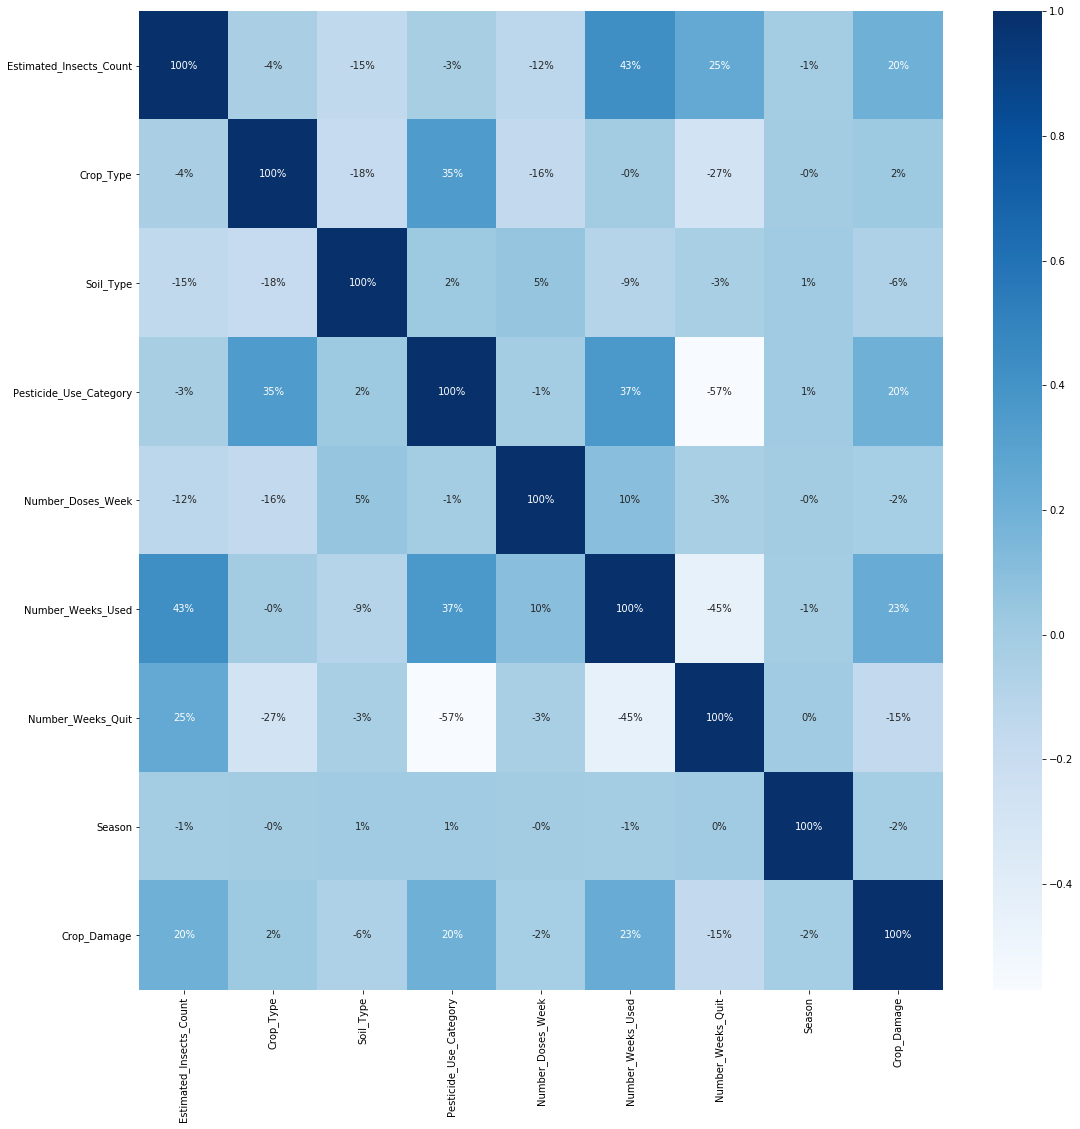

In [17]:
plt.figure(figsize=(18,18))
sns.heatmap(df_cor,annot=True,fmt='.0%',cmap='Blues')
plt.show()

Observations:
1. Estimated_Insects_Counts, Pesticide_Use_Category, and Number_Weeks_Used are positively correlated with target variable i.e., Crop_Damage.
2. Soil Type, Number_Doses_Week, Number_Weeks_Quit are negatively correlated with target variable i.e., Crop_Damage

Text(0.5, 1.0, "Correlation with target variable i.e. 'Crop_Damage'")

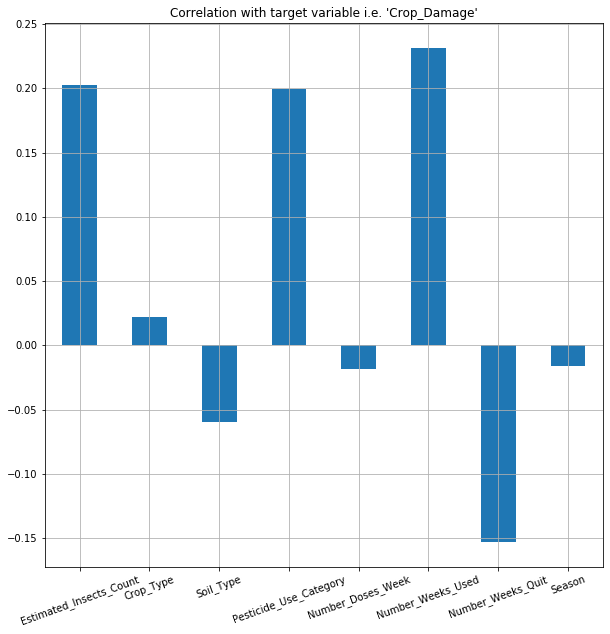

In [18]:
# Graphical representation of correlation of target variable with different columns.
plt.figure(figsize=(10,10))
df.drop('Crop_Damage',axis=1).corrwith(df['Crop_Damage']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("Correlation with target variable i.e. 'Crop_Damage'")

Observations:
1. Estimated_Insects_Counts, Pesticide_Use_Category, and Number_Weeks_Used are positively correlated with target variable i.e., Crop_Damage.
2. Soil Type, Number_Doses_Week, Number_Weeks_Quit are negatively correlated with target variable i.e., Crop_Damage

In [19]:
# Dropping unrelated attribute i.e. 'ID' having zero correlation with target output i.e.,'Crop_Damage'
df.drop(['ID'], axis = 1, inplace=True)

In [20]:
df.shape

(4599, 9)

# Data Visualization

Our target variable of interest is 'Crop_Damage'.

It consists of numerals 0, 1 and 2.

Where 0 implies 'alive', 1 implies 'damage due to other causes' and 2 implies 'Damage due to Pesticides'

# Univariate analysis

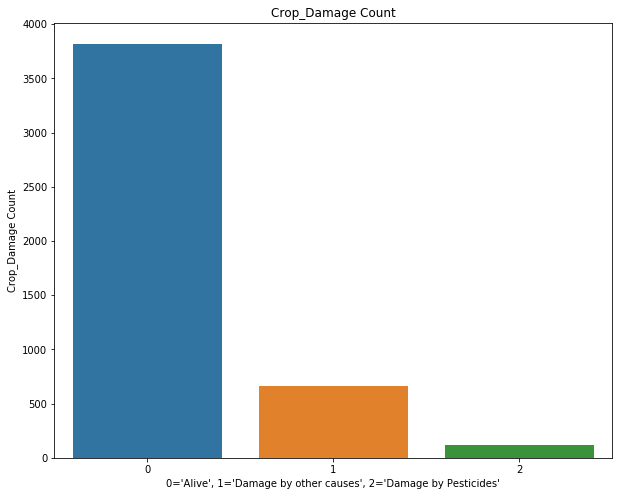

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64


In [21]:
# Checking 'Crop_Damage' count.
plt.subplots(figsize=(10,8))
sns.countplot(x='Crop_Damage',data=df)
plt.title("Crop_Damage Count")
plt.xlabel("0='Alive', 1='Damage by other causes', 2='Damage by Pesticides'")
plt.ylabel("Crop_Damage Count")
plt.show()

print(df.Crop_Damage.value_counts())

Findings:
1. No. of crops alive are 3820
2. No. of crops damaged by other reasons are 664.
3. No. of crops damaged by pesticides are 115.

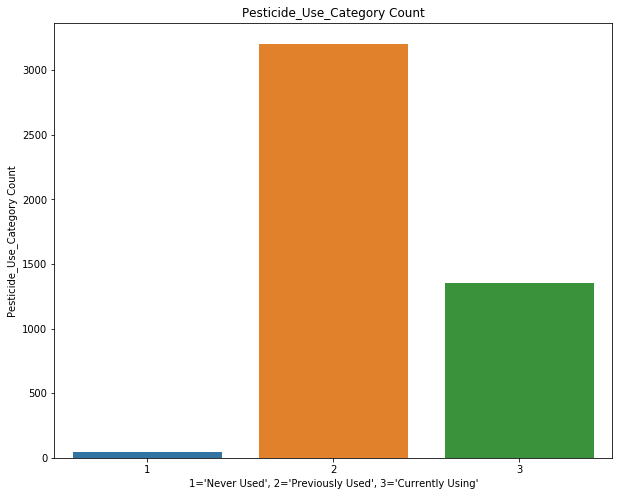

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64


In [22]:
# Checking 'Pesticide_Use_Category' count.
plt.subplots(figsize=(10,8))
sns.countplot(x='Pesticide_Use_Category',data=df)
plt.title("Pesticide_Use_Category Count")
plt.xlabel("1='Never Used', 2='Previously Used', 3='Currently Using'")
plt.ylabel("Pesticide_Use_Category Count")
plt.show()

print(df.Pesticide_Use_Category.value_counts())

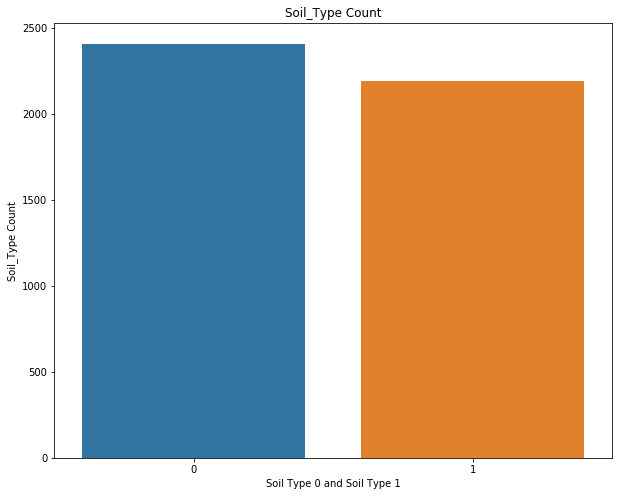

0    2407
1    2192
Name: Soil_Type, dtype: int64


In [23]:
# Checking 'Soil_Type' count.
plt.subplots(figsize=(10,8))
sns.countplot(x='Soil_Type',data=df)
plt.title("Soil_Type Count")
plt.xlabel("Soil Type 0 and Soil Type 1")
plt.ylabel("Soil_Type Count")
plt.show()

print(df.Soil_Type.value_counts())

Findings: Crops are harvested more in Soil_Type 0 than in Soil_Type 1.

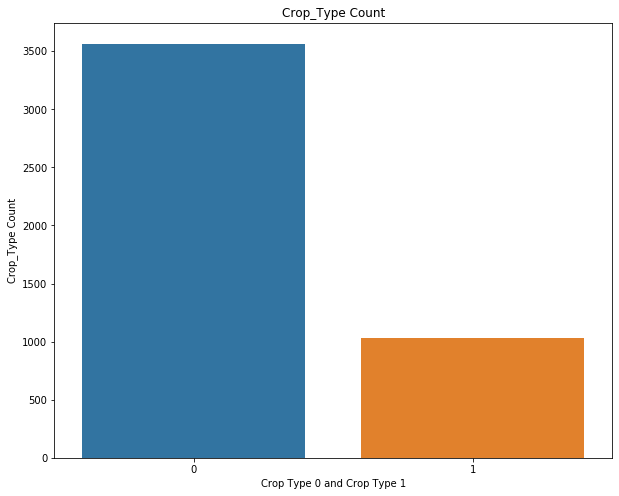

0    3565
1    1034
Name: Crop_Type, dtype: int64


In [24]:
# Checking 'Crop_Type' count.
plt.subplots(figsize=(10,8))
sns.countplot(x='Crop_Type',data=df)
plt.title("Crop_Type Count")
plt.xlabel("Crop Type 0 and Crop Type 1")
plt.ylabel("Crop_Type Count")
plt.show()

print(df.Crop_Type.value_counts())

Findings: Crop_Type 0 is harvested more than Crop_Type 1

# Bivariate Analysis

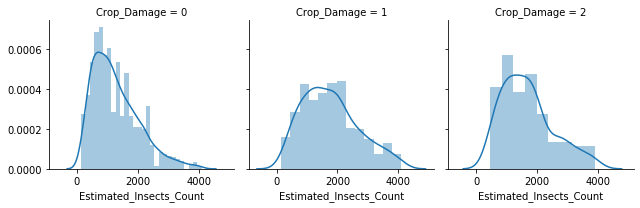

In [25]:
# Exploring Crop_Damage vs Estimated_Insects_Count via FaceGrid
facet=sns.FacetGrid(df,col='Crop_Damage')
facet.map(sns.distplot, "Estimated_Insects_Count")
plt.show()

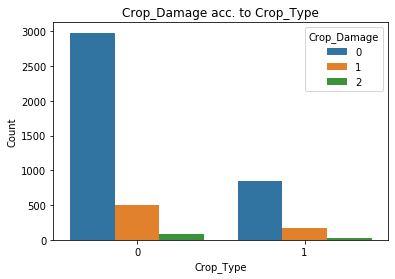

Crop_Type  Crop_Damage
0          0              2979
           1               498
           2                88
1          0               841
           1               166
           2                27
Name: Crop_Damage, dtype: int64


In [26]:
# Crop_Damage vs Crop_Type
sns.countplot(x='Crop_Type',hue='Crop_Damage',data=df)
plt.title('Crop_Damage acc. to Crop_Type')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.show()

print(df.groupby('Crop_Type')['Crop_Damage'].value_counts())

Observations:
1. Out of Crop_Type 0, 2979 were alive, 498 were damaged by other reason and 88 were damaged due to pesticides.
2. Out of Crop_Type 1, 841 were alive, 166 were damaged by other reason and 27 were damaged due to pesticides.

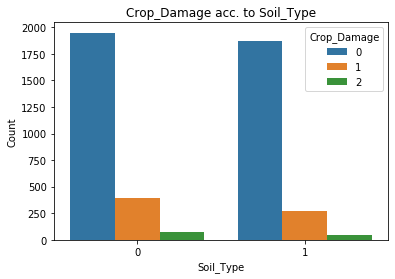

Soil_Type  Crop_Damage
0          0              1947
           1               390
           2                70
1          0              1873
           1               274
           2                45
Name: Crop_Damage, dtype: int64


In [27]:
# Crop_Damage vs Soil_Type
sns.countplot(x='Soil_Type',hue='Crop_Damage',data=df)
plt.title('Crop_Damage acc. to Soil_Type')
plt.xlabel('Soil_Type')
plt.ylabel('Count')
plt.show()

print(df.groupby('Soil_Type')['Crop_Damage'].value_counts())

Observations:
1. Out of Soil_Type 0, 1947 were alive, 390 were damaged by other reason and 70 were damaged due to pesticides.
2. Out of Soil_Type 1, 1873 were alive, 274 were damaged by other reason and 45 were damaged due to pesticides.

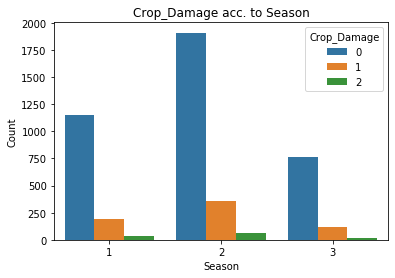

Season  Crop_Damage
1       0              1150
        1               192
        2                37
2       0              1908
        1               358
        2                61
3       0               762
        1               114
        2                17
Name: Crop_Damage, dtype: int64


In [28]:
# Crop_Damage vs Season
sns.countplot(x='Season',hue='Crop_Damage',data=df)
plt.title('Crop_Damage acc. to Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

print(df.groupby('Season')['Crop_Damage'].value_counts())

Observations:
1. Nearly same trend is followed in every season.
2. But, maximum crops were alive in season 2.
3. In season 1, 1150 crops were alive, 192 crops were damaged by other factors, and 37 crops were damaged due to pesticide use.
4. In season 2, 1908 crops were alive, 358 crops were damaged by other factors, and 61 crops were damaged due to pesticide use.
5. In season 3, 762 crops were alive, 114 crops were damaged by other factors, and 17 crops were damaged due to pesticide use.

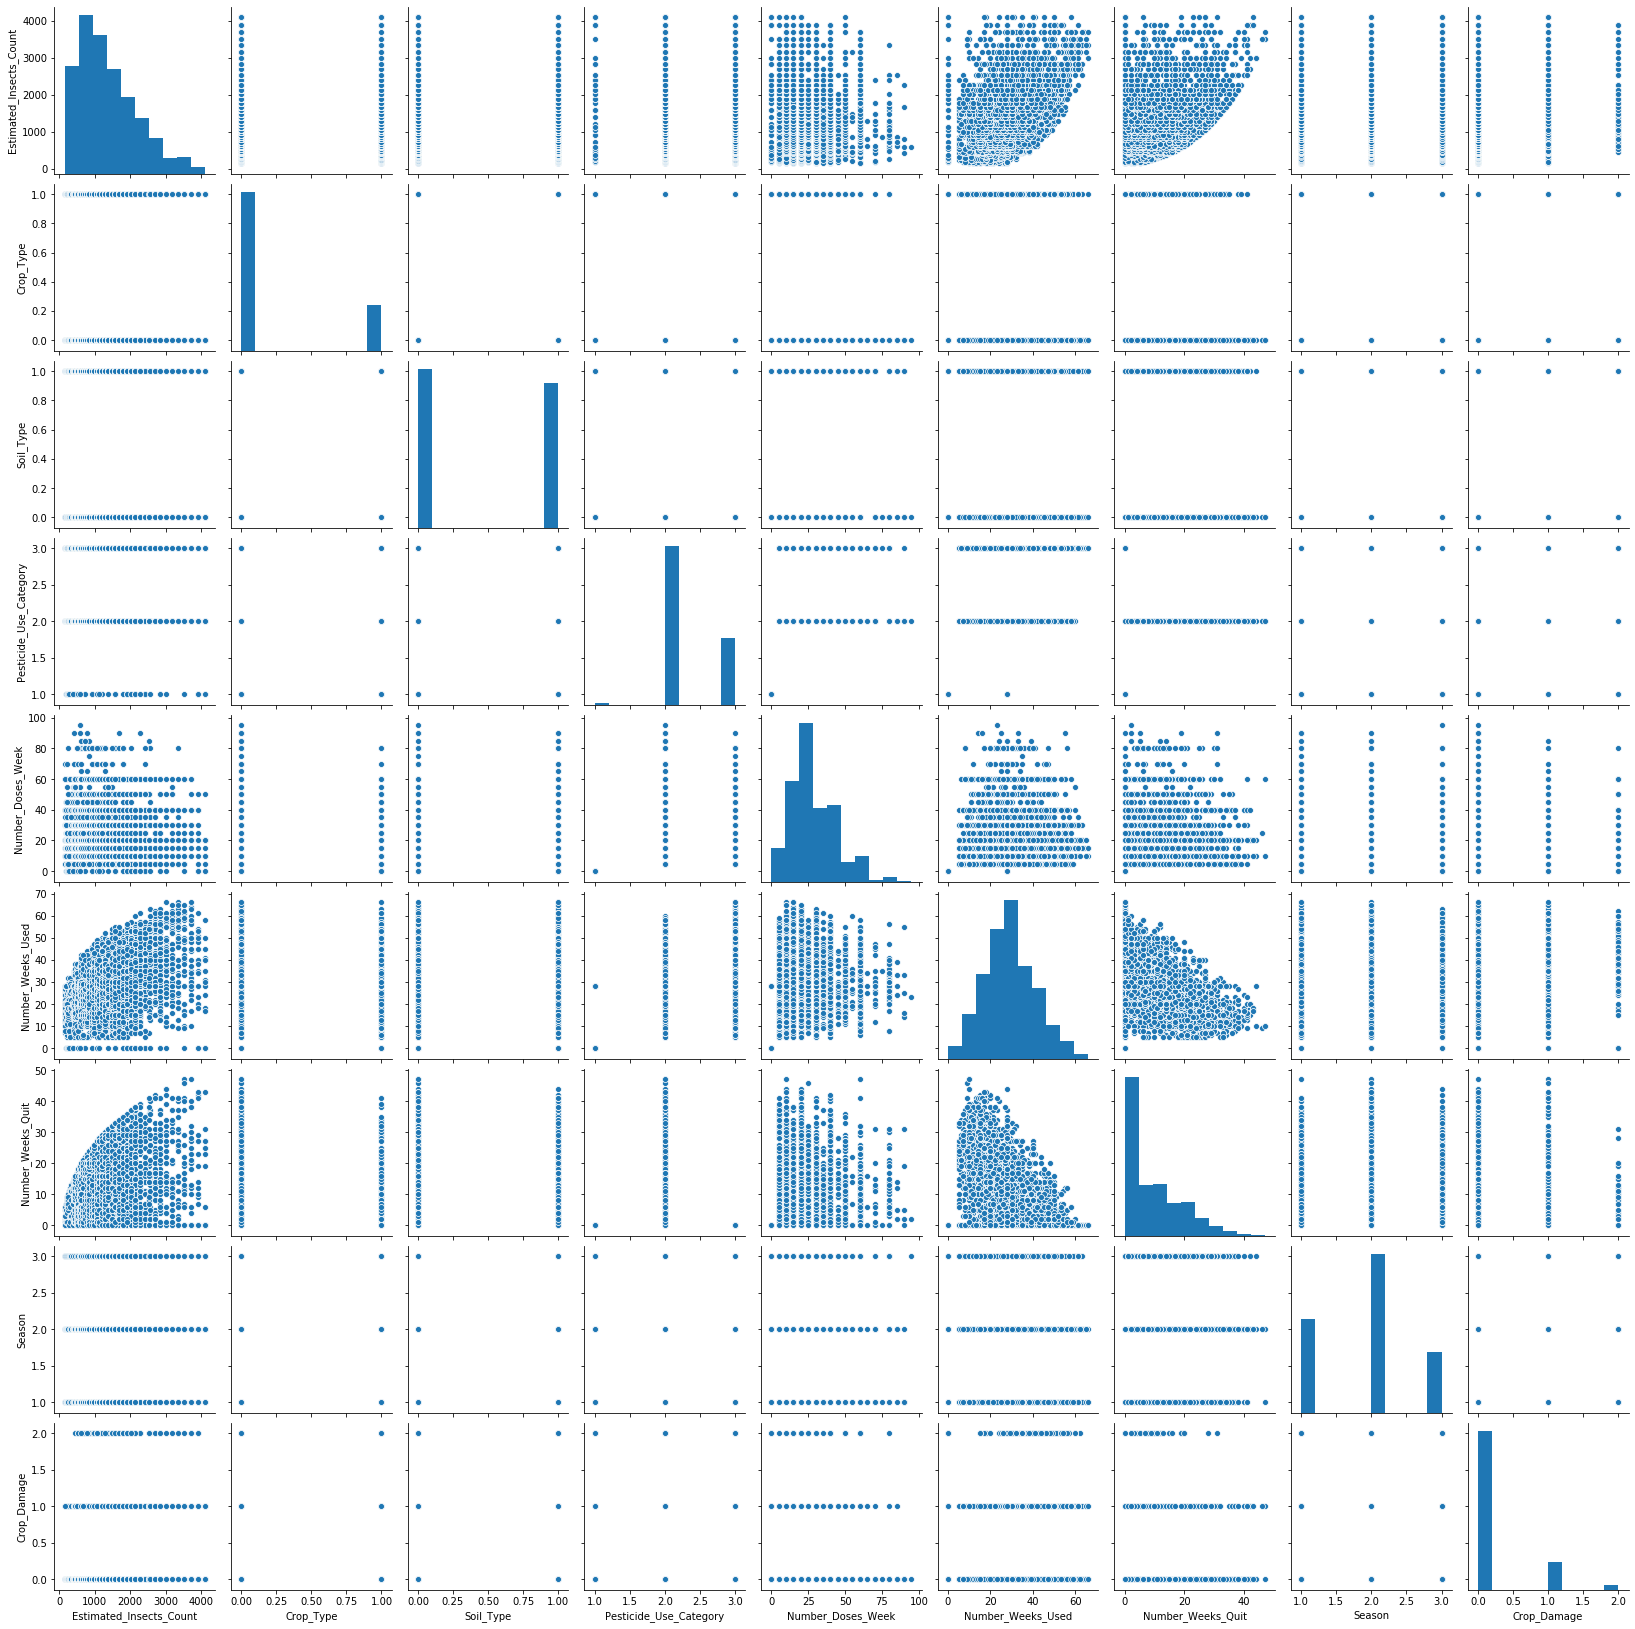

In [29]:
sns.pairplot(df)

# Checking Skewness

In [30]:
df.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.299898
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [31]:
# Treating skewness via square root and cube root method.
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.55:
            df[col]=np.sqrt(df[col])
        if df[col].skew()<-0.55:
            df[col]=np.cbrt(df[col])

In [32]:
# Checking skewness again
df.skew()

Estimated_Insects_Count    0.257248
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.494443
Number_Doses_Week         -0.002742
Number_Weeks_Used          0.299898
Number_Weeks_Quit          0.054299
Season                     0.144841
Crop_Damage                1.868685
dtype: float64

# Plotting Outliers

In [33]:
collist=df.columns.values
ncol=12
nrows=12

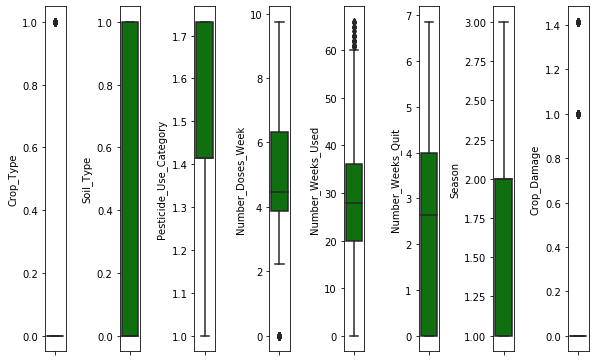

In [34]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Observation: Some outliers are present in the dataset

# Removing Outliers

In [35]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)
# All outliers have been removed.

(4599, 9)
(4437, 9)


Findings: Outliers were present in 162 rows which now have been removed using zscore.

# Model Building

In [36]:
df_x=df_final.drop(columns=["Crop_Damage"])
y=pd.DataFrame(df_final["Crop_Damage"])
print(df_x.shape)
print(y.shape)

(4437, 8)
(4437, 1)


In [37]:
#scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [38]:
# Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [39]:
# Checking the shape
print(x_train.shape,'\t\t',x_test.shape)

(3549, 8) 		 (888, 8)


In [40]:
# checking the shape
print(y_train.shape,'\t',y_test.shape)

(3549, 1) 	 (888, 1)


In [41]:
# Importing all the model library

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Importing Boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

In [42]:
# All algorithm by using for loop

model=[SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('************************************************************************************')
    print('\n')

Accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
0.8468468468468469
[[749  13]
 [123   3]]
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       762
         1.0       0.19      0.02      0.04       126

    accuracy                           0.85       888
   macro avg       0.52      0.50      0.48       888
weighted avg       0.76      0.85      0.79       888

************************************************************************************


Accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       mi

In [43]:
# Cross validate the models

models=[SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in models:
    score=cross_val_score(m,x,y,cv=15,scoring='accuracy')
    print('Model:',m)
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('Standard deviation:',score.std())
    print('************************************************************************************')
    print('\n')

Model: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Score: [0.66216216 0.80405405 0.85810811 0.85810811 0.85810811 0.85810811
 0.85810811 0.85810811 0.84459459 0.80067568 0.85810811 0.85810811
 0.84067797 0.86101695 0.85762712]
Mean Score: 0.8357115590166438
Standard deviation: 0.05005741718218553
************************************************************************************


Model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_stat

# Using GridSearchCV to find out the best parameter in Adaboost Classifier

In [44]:
# AdaBoostClassifier model is giving the best result so finding its best parameters using GridSearchCV
#from sklearn.model_selection import GridSearchCV
#adb=AdaBoostClassifier()
#parameters={'base_estimator':[object,None],'learning_rate':[0.01,0.1,1.0],'algorithm':['SAMME','SAMME.R'],'random_state':range(40,50)}
#clf=GridSearchCV(adb,parameters)
#clf.fit(x,y)
#clf.best_params_
# GRIDSEARCHCV HANGS WHEN I RUN THE ABOVE CODE. SO, I AM SKIPPING THIS STEP.

In [45]:
# Adaboost with its parameters

adb=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.001,n_estimators=50, random_state=42)
adb.fit(x_train,y_train)
adb.score(x_train,y_train)
predadb=adb.predict(x_test)
print(accuracy_score(y_test,predadb))
print(confusion_matrix(y_test,predadb))
print(classification_report(y_test,predadb))

0.8581081081081081
[[762   0]
 [126   0]]
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92       762
         1.0       0.00      0.00      0.00       126

    accuracy                           0.86       888
   macro avg       0.43      0.50      0.46       888
weighted avg       0.74      0.86      0.79       888



In [46]:
# Cross Validate AdaBoostClassifier.

score=cross_val_score(adb,x,y,cv=15,scoring='accuracy')

print(score)
print('Mean:',score.mean())
print('Std:',score.std())

[0.85810811 0.85810811 0.85810811 0.85810811 0.85810811 0.85810811
 0.85810811 0.85810811 0.85810811 0.85810811 0.85810811 0.85810811
 0.86101695 0.86101695 0.85762712]
Mean: 0.8584638876164301
Std: 0.001008476654165805


# Among all the models AdaBoostClassifier gives highest score of 0.85, and accuracy of 0.86 so we adopt AdaBoostClassifier as our final model.

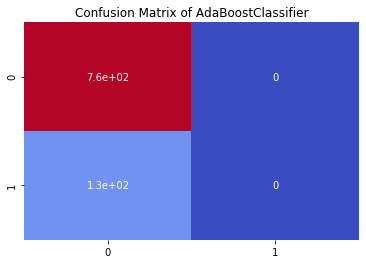

In [47]:
# Plotting confusion Matrix for AdaBoostClassifier.
cm=confusion_matrix(y_test,predadb)
sns.heatmap(cm,annot=True,cbar=False,cmap='coolwarm')

plt.title("Confusion Matrix of AdaBoostClassifier")
plt.show()

In [48]:
#Saving the the AdaBoostClassifier as our final model
from sklearn.externals import joblib
joblib.dump(adb,'agriculture.obj')

['agriculture.obj']

In [49]:
# Loading the test data.
test_x=pd.read_excel(r"E:\Datasets\test_agriculture.xlsx")
test_x

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [50]:
# Dropping irrelevant attribute 'ID'
test_x.drop(['ID'], axis = 1, inplace=True)

In [51]:
# Checking for null values
test_x.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [52]:
# Imputing the missing value with their median.
test_x['Number_Weeks_Used'].fillna(test_x['Number_Weeks_Used'].median(),inplace=True)

In [53]:
# Checking null values again.
test_x.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [54]:
# Loading the model
adb_from_joblib=joblib.load('agriculture.obj')

In [56]:
# using the loaded model to make predictions

prediction=adb_from_joblib.predict(test_x)
prediction

array([0., 0., 0., ..., 0., 0., 0.])

In [61]:
res = pd.DataFrame(prediction)

res.columns = ["prediction"]
res.to_csv("agriculture_prediction_results.csv")